In [3]:
import pandas as pd
import numpy as np
import random as rnd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, f1_score, confusion_matrix
from scipy.stats import boxcox

In [4]:
df_ml=pd.read_csv('C:\\Boot Camp\Homework\\final-project\\data\\ML_data.csv')
df_ml.head()

,loan_amnt,int_rate,emp_length,annual_inc,dti,loan_status,total_pymnt,fico_range_high,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000.0,0.1065,10.0,24000.0,27.65,1,5863.155187,739.0,0,0,0,0,1
1,2500.0,0.1527,0.0,30000.0,1.00,0,1014.530000,744.0,0,0,0,0,1
2,2400.0,0.1596,10.0,12252.0,8.72,1,3005.666844,739.0,0,0,0,0,1
3,10000.0,0.1349,10.0,49200.0,20.00,1,12231.890000,694.0,0,0,0,0,1
4,3000.0,0.1269,1.0,80000.0,17.94,1,4066.908161,699.0,0,0,0,0,1


In [5]:
df_ml=df_ml.dropna()

In [6]:
# Set features. This will also be used as your x values.
X = df_ml.drop("loan_status", axis=1)
y=df_ml["loan_status"]
print(X.shape, y.shape)

(1743060, 12) (1743060,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17, test_size=0.3, stratify=y)

In [8]:
model = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)

In [9]:
predict = model.predict(X_test)

In [10]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9998467391500333
Testing Data Score: 0.977698224195763


In [11]:
# recall score
recall_score(y_test, predict)

0.9991237082964275

In [12]:
f1_score(y_test, predict)

0.9864026956754929

(0.0, 2.0, 2.0, 0.0)

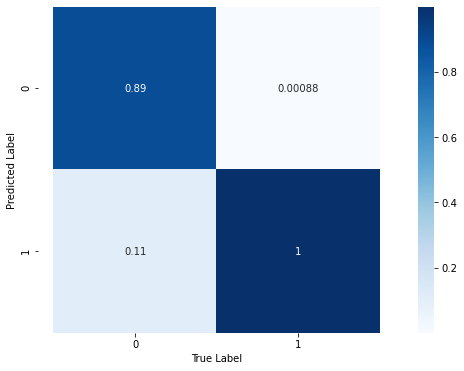

In [13]:
fig, axes = plt.subplots(figsize=(8,6))
cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.axis('equal')

In [14]:
#using 70% data for training and 30% for testing.
traindata, testdata = train_test_split(df_ml, stratify=y,test_size=0.3, random_state=17)
testdata.reset_index(drop=True, inplace=True)
traindata.reset_index(drop=True, inplace=True)

In [15]:
#Balancing the training dataset and creating a new model
y_default = traindata[traindata['loan_status'] == 0]
n_paid = traindata[traindata['loan_status'] == 1].sample(n=len(y_default), random_state=17) #chosing equal amount of 1's

#creating a new dataframe for balanced set
data = y_default.append(n_paid) 

#creating the independent and dependent array
Xbal = data.drop('loan_status', axis=1)
ybal = data['loan_status']

In [16]:
Xte = testdata.drop('loan_status', axis=1)
yte = testdata['loan_status']

In [27]:
#Let's try some models on the train dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'RF': RandomForestClassifier(n_estimators=50),
          'LR': LogisticRegression(C=1)}

balset = {}
for i in models.keys():
    scores = cross_val_score(models[i], Xbal - np.min(Xbal) + 1,
                                    ybal, scoring='f1', cv=3)
    balset[i] = scores
    print(i, scores, np.mean(scores))

LDA [0.89224289 0.89284802 0.89348024] 0.8928570498669687
MNB [0.78301549 0.78288743 0.78517705] 0.7836933231450388
RF [0.94803418 0.94945507 0.95053447] 0.9493412377430914
LR [0.93886792 0.93988511 0.94032268] 0.9396919030212992


In [18]:
#try to find the optimal number of trees using the gridsearchcv
Xte = testdata.drop('loan_status', axis=1)
model = RandomForestClassifier(n_estimators=50)
model.fit(Xbal, ybal)
predict = model.predict(Xte)

In [25]:
print(f"Training Data Score: {model.score(Xbal, ybal)}")
print(f"Testing Data Score: {model.score(Xte, yte)}")
print(f"recall scor: {recall_score(yte, predict)}")
print(f"f1 score: {f1_score(yte, predict)}")

Training Data Score: 0.9999031287268532
Testing Data Score: 0.9712842166458221
recall scor: 0.9849542367877178
f1 score: 0.9823138514014883


(0.0, 2.0, 2.0, 0.0)

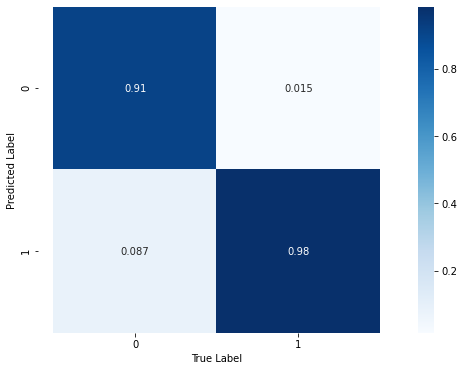

In [19]:
fig, axes = plt.subplots(figsize=(8,6))
cm = confusion_matrix(yte, predict).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.axis('equal')

In [28]:
#Let's find the optimum number of estimators for this model and use that for prediction
params = {'n_estimators': [50, 100, 200, 400, 600]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params,
                                   scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(Xbal, ybal)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_estimators': 600}
0.9512925619910592
